In [68]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
House_df=pd.read_csv(r"C:\Users\prati\Downloads\archive (4)\Housing.csv")
House_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [70]:
House_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [71]:
cat=House_df.select_dtypes(include='object').columns
num=House_df.select_dtypes(exclude='object').columns
cat,num

(Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
        'airconditioning', 'prefarea', 'furnishingstatus'],
       dtype='object'),
 Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object'))

In [72]:
House_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [73]:
House_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


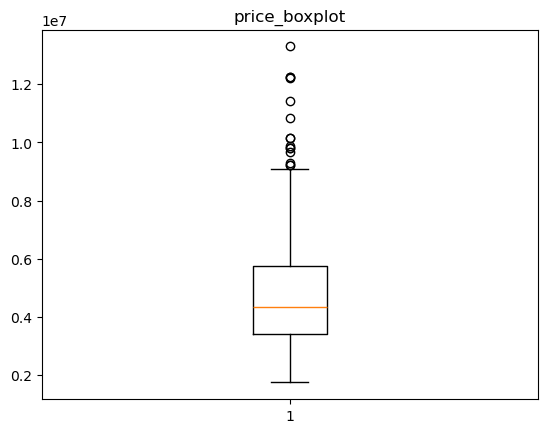

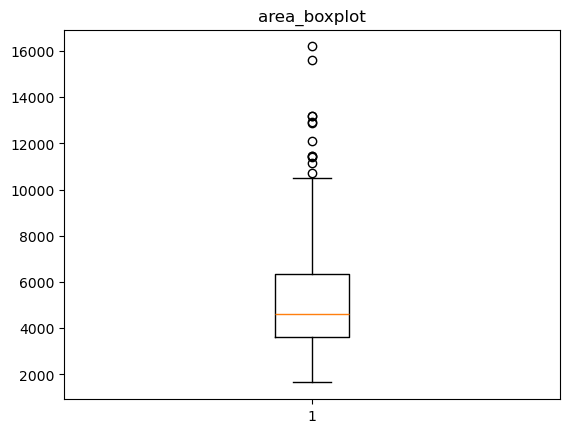

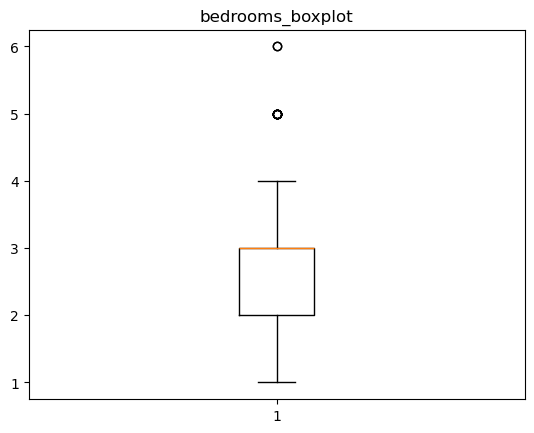

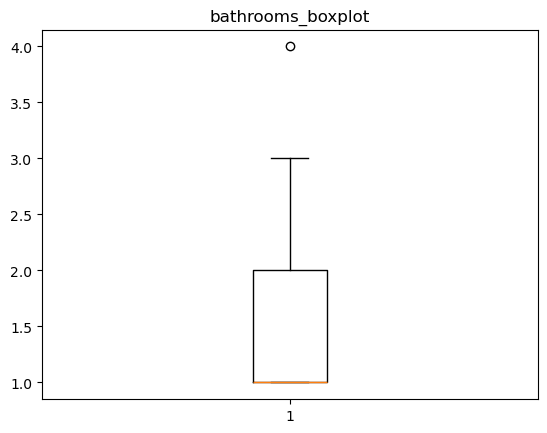

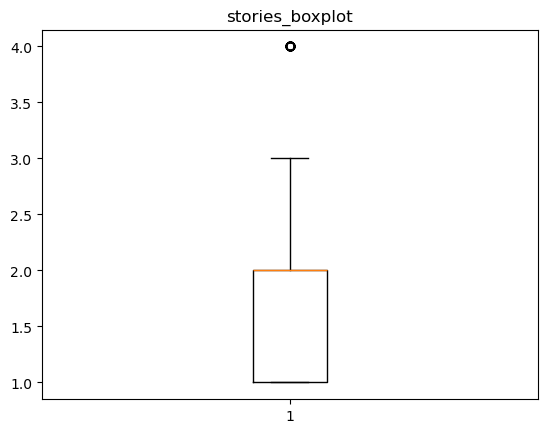

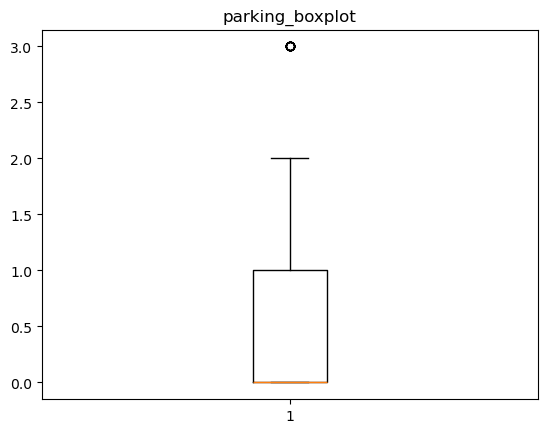

In [74]:
for i in num:
    plt.boxplot(House_df[i])
    plt.title(f'{i}_boxplot')
    plt.show()


In [75]:
for i in num:
    Q1=np.quantile(House_df[i],0.25)
    Q3=np.quantile(House_df[i],0.75)
    IQR=Q3-Q1
    lb=Q1-1.5*IQR
    ub=Q3+1.5*IQR
    Median=House_df[i].median()
    cond1=House_df[i]<lb
    cond2=House_df[i]>ub
    cond=cond1|cond2
    true=Median
    false=House_df[i]
    House_df[i]=np.where(cond,true,false)

In [76]:
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()
for i in cat:
    House_df[i]=encoding.fit_transform(House_df[i])
House_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4340000.0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,0
1,4340000.0,8960.0,4.0,1.0,2.0,1,0,0,0,1,0.0,0,0
2,4340000.0,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,1
3,4340000.0,7500.0,4.0,2.0,2.0,1,0,1,0,1,0.0,1,0
4,4340000.0,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2.0,1.0,1.0,1,0,1,0,0,2.0,0,2
541,1767150.0,2400.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,1
542,1750000.0,3620.0,2.0,1.0,1.0,1,0,0,0,0,0.0,0,2
543,1750000.0,2910.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,0


In [77]:
x=House_df.drop('furnishingstatus',axis=1)
y=House_df['furnishingstatus']

In [78]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in x:
    x[i]=ss.fit_transform(x[[i]])
x

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,-0.161140,1.334706,1.647621,1.472436,2.213845,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.729065,1.804941
1,-0.161140,2.174467,1.647621,-0.574701,0.567807,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.790562,-0.554035
2,-0.161140,2.719766,0.125666,1.472436,0.567807,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.729065,1.804941
3,-0.161140,1.378330,1.647621,1.472436,0.567807,0.405623,-0.465315,1.361397,-0.219265,1.472618,-0.790562,1.804941
4,-0.161140,1.334706,1.647621,-0.574701,0.567807,0.405623,2.149083,1.361397,-0.219265,1.472618,1.729065,-0.554035
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.763079,-1.075516,-1.396289,-0.574701,-1.078230,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.729065,-0.554035
541,-1.796676,-1.402696,0.125666,-0.574701,-1.078230,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.790562,-0.554035
542,-1.807578,-0.737431,-1.396289,-0.574701,-1.078230,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.790562,-0.554035
543,-1.807578,-1.124593,0.125666,-0.574701,-1.078230,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.790562,-0.554035


In [79]:
# 2.Split data into train-test sets.

In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [81]:
x_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
46,1.863533,0.560381,0.125666,1.472436,0.567807,0.405623,-0.465315,-0.734539,-0.219265,1.472618,0.469252,-0.554035
93,1.084812,1.214740,0.125666,1.472436,-1.078230,0.405623,-0.465315,1.361397,-0.219265,1.472618,-0.790562,-0.554035
335,-0.428130,-0.630552,-1.396289,-0.574701,-1.078230,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.729065,-0.554035
412,-0.739618,-1.288183,0.125666,-0.574701,0.567807,0.405623,-0.465315,1.361397,-0.219265,-0.679063,-0.790562,1.804941
471,-1.006608,-0.666542,0.125666,-0.574701,0.567807,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.790562,-0.554035
...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.374051,0.560381,1.647621,1.472436,0.567807,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.790562,-0.554035
106,0.995816,0.260467,1.647621,1.472436,-1.078230,0.405623,-0.465315,1.361397,-0.219265,1.472618,-0.790562,1.804941
270,-0.161140,-0.257567,0.125666,1.472436,2.213845,0.405623,-0.465315,-0.734539,4.560702,-0.679063,0.469252,-0.554035
435,-0.828615,-0.508405,-1.396289,-0.574701,-1.078230,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.790562,-0.554035


In [82]:
x_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
316,-0.339134,0.505852,1.647621,1.472436,0.567807,-2.465344,-0.465315,1.361397,-0.219265,-0.679063,0.469252,-0.554035
77,1.307304,0.833031,0.125666,1.472436,2.213845,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.790562,1.804941
360,-0.561625,-0.508405,-1.396289,-0.574701,-1.078230,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.790562,-0.554035
90,1.173809,0.015082,0.125666,-0.574701,0.567807,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.790562,-0.554035
493,-1.140103,-0.552029,0.125666,-0.574701,-1.078230,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.790562,-0.554035
...,...,...,...,...,...,...,...,...,...,...,...,...
15,2.864745,0.560381,1.647621,-0.574701,0.567807,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.729065,-0.554035
357,-0.521577,1.067510,1.647621,-0.574701,0.567807,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,0.469252,-0.554035
39,2.108273,0.560381,1.647621,1.472436,0.567807,0.405623,-0.465315,-0.734539,-0.219265,1.472618,0.469252,-0.554035
54,1.752287,0.560381,0.125666,1.472436,0.567807,0.405623,2.149083,-0.734539,-0.219265,1.472618,0.469252,-0.554035


In [83]:
y_train

46     0
93     1
335    0
412    2
471    2
      ..
71     2
106    1
270    0
435    2
102    1
Name: furnishingstatus, Length: 436, dtype: int32

In [84]:
y_pred=model.predict(x_test)

In [85]:
# 3.Fit a Linear Regression model using sklearn.linear_model.

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)  


LinearRegression()

In [86]:
# 4.Evaluate model using MAE, MSE, R².

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Assuming you have y_actual and y_prediction.
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 0.6396850145526647
MSE: 0.58788443838035
R²: 0.06697101090075652


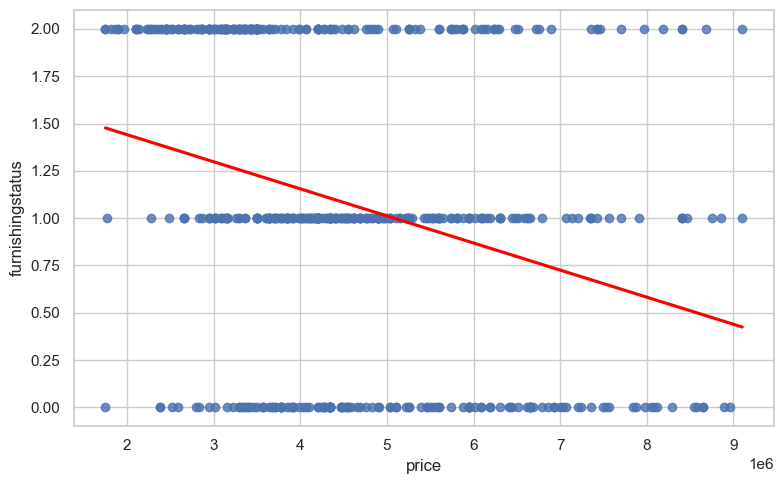

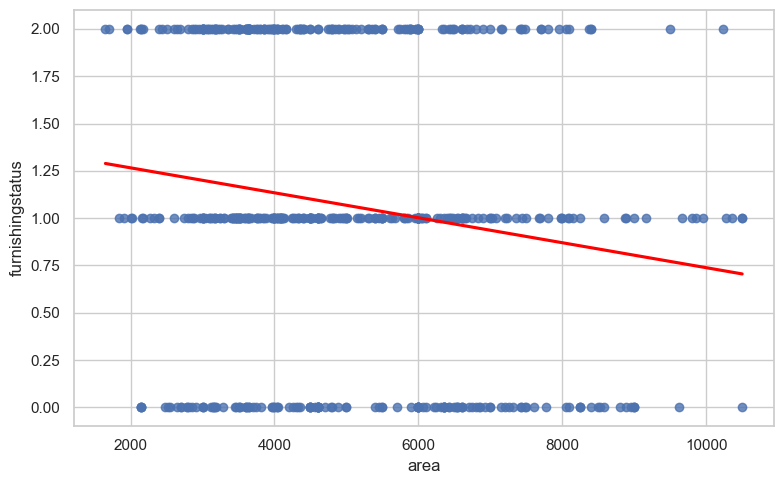

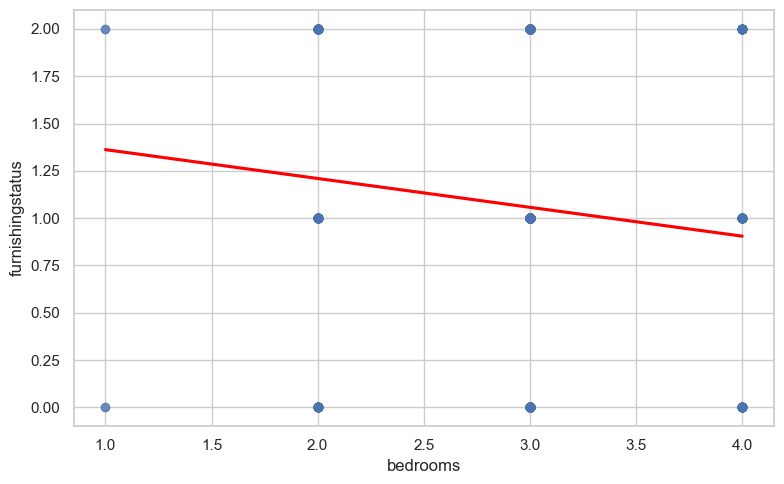

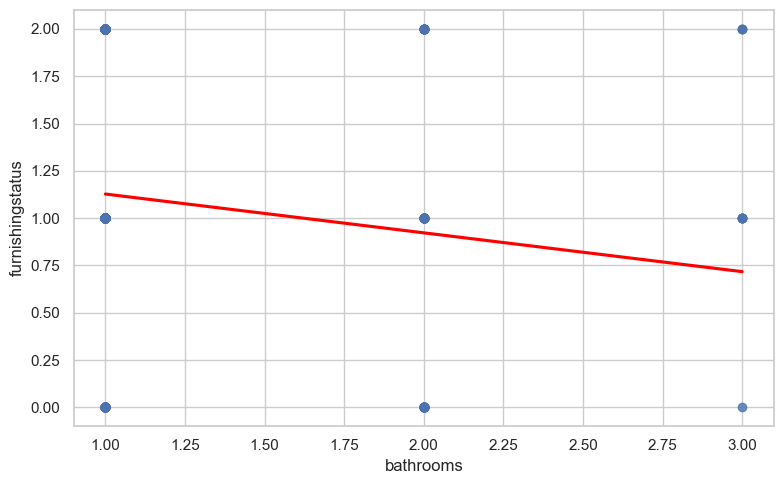

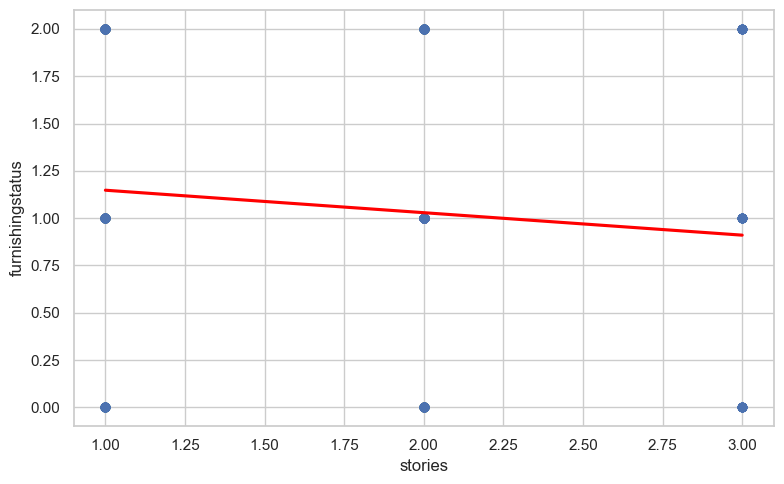

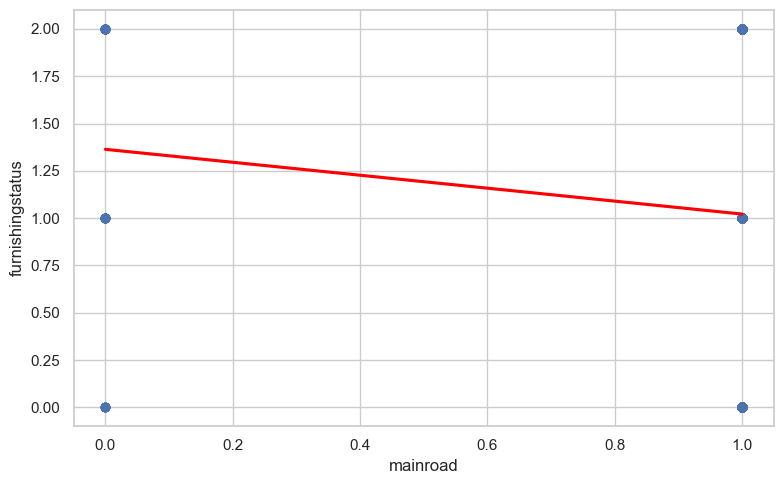

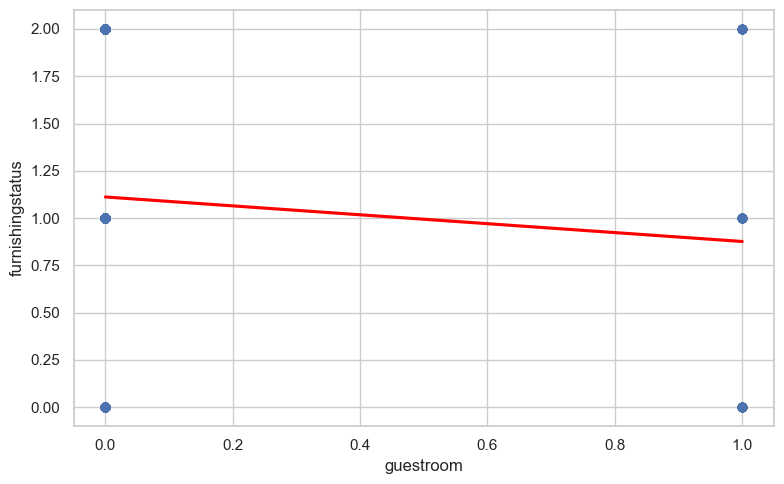

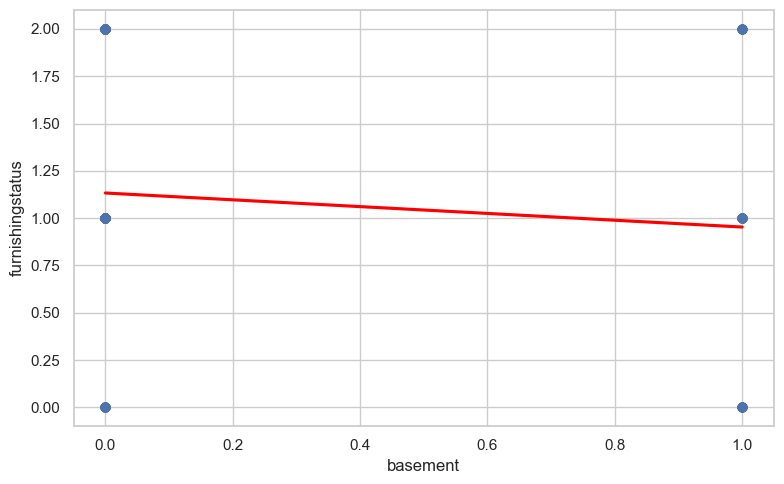

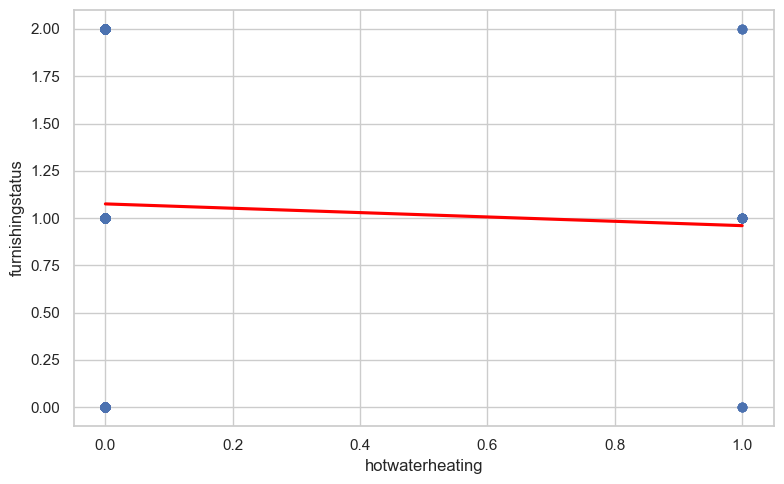

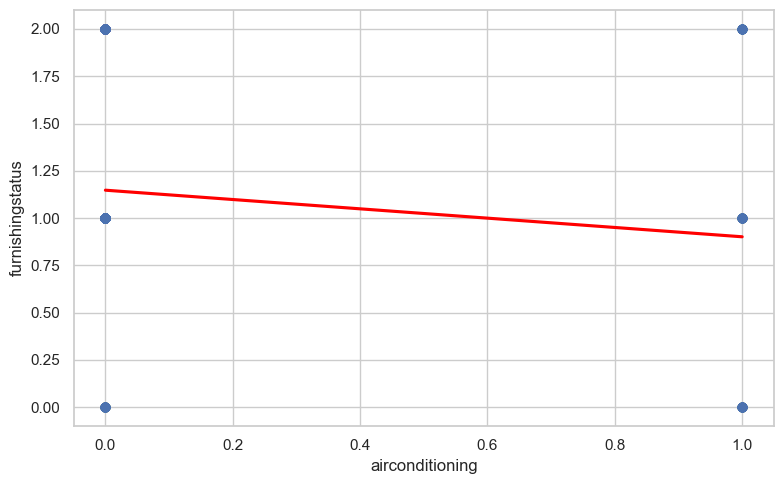

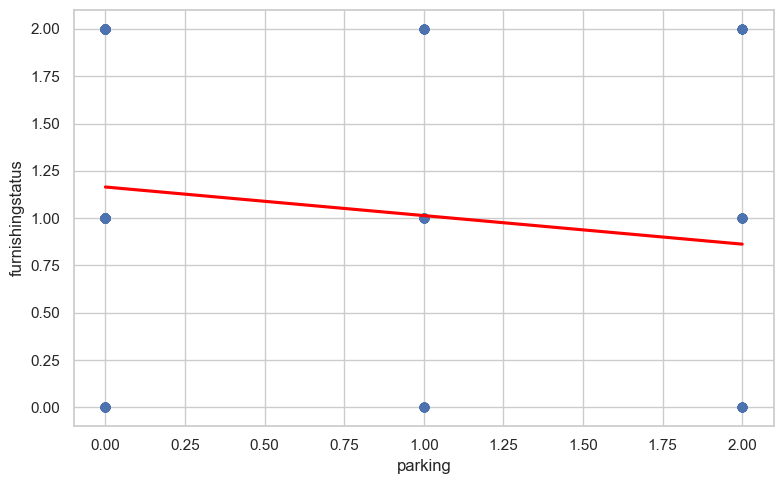

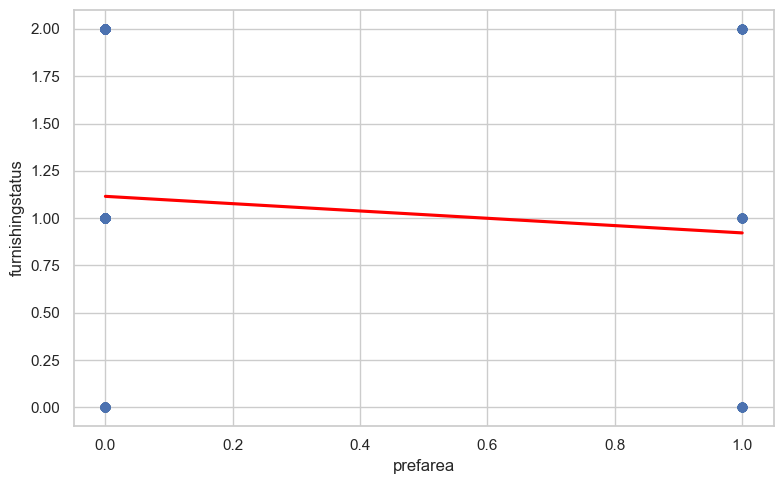

In [89]:
# 5.Plot regression line and interpret coefficients.

for i in x.columns:   
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 5))
    sns.regplot(x=House_df[i], y=y, data=House_df, ci=None, line_kws={"color": "red"})
    plt.xlabel(f'{i}')
    plt.ylabel('furnishingstatus')
    plt.tight_layout()
    plt.show()

In [ ]:
sns.set(style="whitegrid")
    plt.figure(figsize=(8, 5))
    sns.regplot(x=House_df[i], y=Y, data=House_df, ci=None, line_kws={"color": "red"})
    plt.xlabel(f'{i}')
    plt.ylabel('furnishingstatus')
    plt.tight_layout()
    plt.show()

In [90]:
y_pred

array([1.19815858, 0.85247599, 1.25596503, 0.84109281, 1.32722699,
       1.1519911 , 0.98709726, 0.97482015, 1.50338013, 1.44283446,
       1.09914172, 1.36816545, 1.42646413, 1.26373346, 1.19848525,
       1.52880409, 1.28219586, 0.71135217, 1.112382  , 1.38518083,
       0.83216225, 0.89483087, 1.44644645, 0.81832515, 1.12103322,
       1.04327685, 1.1444668 , 0.8797877 , 0.84556333, 1.31672414,
       0.70025103, 1.13617967, 0.79736971, 1.31457173, 1.2109705 ,
       1.05986777, 0.80155884, 0.98509936, 1.38039305, 1.30822427,
       1.01151784, 1.19036456, 0.85093235, 1.00392952, 1.36918693,
       1.09626436, 0.87794763, 0.8955772 , 1.4102655 , 1.20408821,
       0.6083362 , 1.32296942, 1.21698305, 1.15879813, 1.0615659 ,
       1.62130169, 1.06366444, 1.32463774, 1.13285292, 1.32368975,
       1.01947836, 1.40007809, 1.12729265, 1.14336136, 1.03628176,
       0.71803673, 0.84954882, 0.87130508, 1.14763002, 0.63979036,
       1.28238518, 0.99272579, 1.28245391, 0.84334172, 1.17159